# Classification des partis politiques

Ce notebook a pour objectif de classifier des partis politiques en utilisant des modèles d'apprentissage automatique. Les étapes suivantes seront suivies :


1. **Chargement des Données** :
- Nous chargeons les données vectorisées à partir des fichiers CSV et les préparons pour l'entraînement et le test.

2. **Entraînement et Évaluation du Modèle** :
- Nous définissons une fonction `classification_data` qui permet d'entraîner et d'évaluer un modèle de classification.
( Nous utilisons cette fonction pour entraîner différents modèles et évaluer leurs performances.


### Récupération des valeurs des classes de nos données en train et test :

In [1]:
# Importation de la librairie nécessaire à la section :
import pandas as pd
from scipy.sparse import load_npz

In [2]:
# On charge les valeurs des classes de nos documents en train et en test : 
df_classes_train = pd.read_csv("./data_parlement/train/real_classes_data_train.csv")
df_classes_test = pd.read_csv("./data_parlement/test/real_classes_data_test.csv")

In [3]:
# On convertit ces deux tableaux en deux listes qui correpondent aux classes des documents : 
classes_train = df_classes_train["Classe"].tolist()
classes_test = df_classes_test["Classe"].tolist()

# On regarde si on a bien les mêmes résultats que dans le notebook vectorizer.ipynb :
print(f" 📚 Les classes du corpus test 📚 : \n {classes_test[:10]}")
print(f"📚 Les classes du corpus train 📚 : \n {classes_train[:10]}")

 📚 Les classes du corpus test 📚 : 
 ['GUE-NGL', 'PPE-DE', 'PPE-DE', 'PPE-DE', 'Verts-ALE', 'PPE-DE', 'GUE-NGL', 'PSE', 'PPE-DE', 'PPE-DE']
📚 Les classes du corpus train 📚 : 
 ['Verts-ALE', 'PPE-DE', 'Verts-ALE', 'PSE', 'PSE', 'Verts-ALE', 'PPE-DE', 'PPE-DE', 'PSE', 'PPE-DE']


### Récupération des valeurs de nos features correspondantes à chacun de nos documents en train et test : 

In [4]:
# On vient lire et récupérer les matrices enregistrées en sparse de nos données textuelles :

# On charge les matrices de nos données textuelles en train
datas_train = load_npz("./data_parlement/train/features_data_train.npz")

# On charge les matrices de nos données textuelles en test
datas_test = load_npz("./data_parlement/test/features_data_test.npz")

In [5]:
# on affiche les dimensions de nos matrices :
print(f"📚 Les dimensions de la matrice en train 📚 : {datas_train.shape}")
print(f"📚 Les dimensions de la matrice en test 📚 : {datas_test.shape}")

📚 Les dimensions de la matrice en train 📚 : (19370, 54760)
📚 Les dimensions de la matrice en test 📚 : (5106, 54760)


Tout semble correct, nous avons des matrices de la mêmes tailles que celles que nous avons créée avec la méthode tf-idf dans le notebook _vectorizer.ipynb_ .

Les classes sont aussi ordonnées de la même manière, rien ne semble avoir été perdu.

➮ Nous allons donc pouvoir commencer l'entrainement ! 

## Entraînement de nos modèles : 

In [6]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# On importe les libraires de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# On crée une fonction pour afficher les résultats de la classification
def classification_data(model, X_train, y_train, X_test, y_test, model_name, class_names):
    """
    Cette fonction permet d'entrainer et évaluer un modèle donné.
    
    Paramètres :
    - model: Le modèle d'apprentissage à entrainer.
    - X_train: Les données d'entraînement.
    - y_train: Les labels d'entraînement.
    - X_test: Les données de test.
    - y_test: Les labels de test.
    - model_name: Le nom de l'algorithme de classification.
    """
    
    print(" 🥁 Chargement ... 🥁")
    
    # Entraîne le modèle
    model.fit(X_train, y_train)
    
    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)
    
    # Résultats de la classification
    print(f"🎄 Résultat : {model_name} 🎄")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # Matrice de confusion
    print("🎨 Matrice de Confusion 🎨")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, fmt="d", annot=True, cmap="flare", 
             xticklabels=class_names, yticklabels=class_names)
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédiction")
    plt.ylabel("Réalité")
    plt.tight_layout()
    plt.show()

    return model_name, cm, y_pred

In [8]:
# Définition d'une fonction qui calcule la macro précision, le macro rappel et le f1-score pondérée :

def metrics_classification(y_test, y_pred):
    """
    Cette fonction permet de calculer la macro précision, le macro rappel et le f1-score pondérée.
    
    Paramètres :
    - y_test: Les labels de test.
    - y_pred: Les labels prédits.
    """
    
    # On calcule la macro précision
    macro_precision = round(precision_score(y_test, y_pred, average='macro'), 2)
    
    # On calcule le macro rappel
    macro_recall = round(recall_score(y_test, y_pred, average='macro'), 2)
    
    # On calcule le f1-score pondérée
    waighted_f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)

    print(f"Macro Précision : {macro_precision}")
    print(f"Macro Rappel : {macro_recall}")
    print(f"F1-score pondérée : {waighted_f1}")
    
    return macro_precision, macro_recall, waighted_f1

In [49]:
class_names = ["ELDR", "GUE/NGL", "PPE-DE", "PSE", "Verts/ALE"]

## Test des algorithmes de classification

#### 1) **Arbre de décision**

In [10]:
from sklearn.tree import DecisionTreeClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Arbre de Décision 🎄
              precision    recall  f1-score   support

        ELDR       0.16      0.14      0.15       525
     GUE-NGL       0.37      0.36      0.37       715
      PPE-DE       0.43      0.44      0.43      1803
         PSE       0.32      0.33      0.32      1448
   Verts-ALE       0.16      0.16      0.16       615

    accuracy                           0.33      5106
   macro avg       0.29      0.29      0.29      5106
weighted avg       0.33      0.33      0.33      5106

Accuracy: 0.3321582452017235
🎨 Matrice de Confusion 🎨


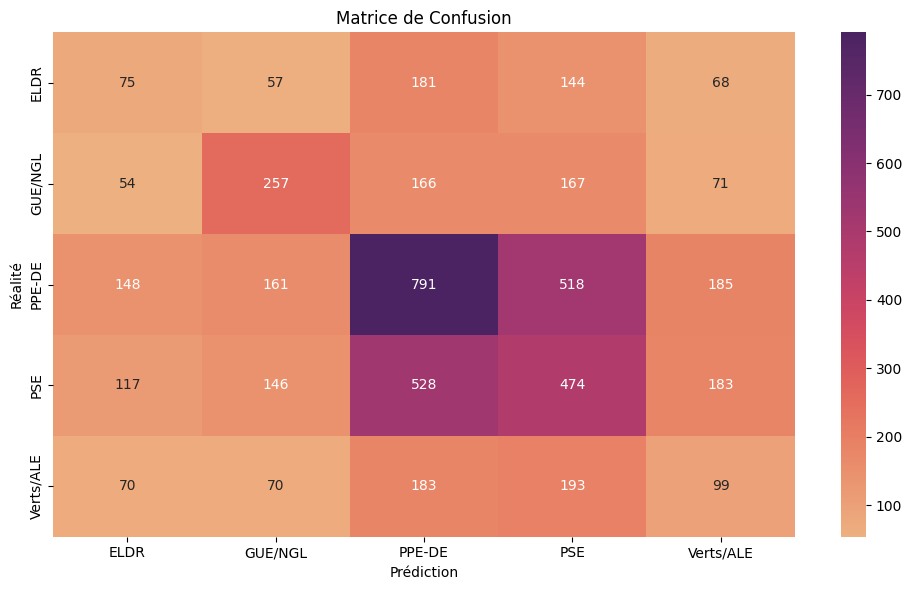

In [11]:
# Création du modèle --> 1 minute et 17 secondes
tree_model = DecisionTreeClassifier(random_state=42)

# On appelle notre fonction de classification
name_tree_model, cm_tree_model, pred_tree_model = classification_data(tree_model, datas_train, classes_train, datas_test, classes_test, "Arbre de Décision", class_names)

In [12]:
# Calcul des métriques :
macro_precision_tree_model, macro_recall_tree_model, waighted_f1_tree_model = metrics_classification(classes_test, pred_tree_model)

Macro Précision : 0.29
Macro Rappel : 0.29
F1-score pondérée : 0.33


#### 2) **Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Random Forest 🎄
              precision    recall  f1-score   support

        ELDR       1.00      0.00      0.00       525
     GUE-NGL       0.84      0.30      0.44       715
      PPE-DE       0.39      0.90      0.55      1803
         PSE       0.37      0.18      0.24      1448
   Verts-ALE       1.00      0.00      0.00       615

    accuracy                           0.41      5106
   macro avg       0.72      0.28      0.25      5106
weighted avg       0.58      0.41      0.32      5106

Accuracy: 0.4112808460634548
🎨 Matrice de Confusion 🎨


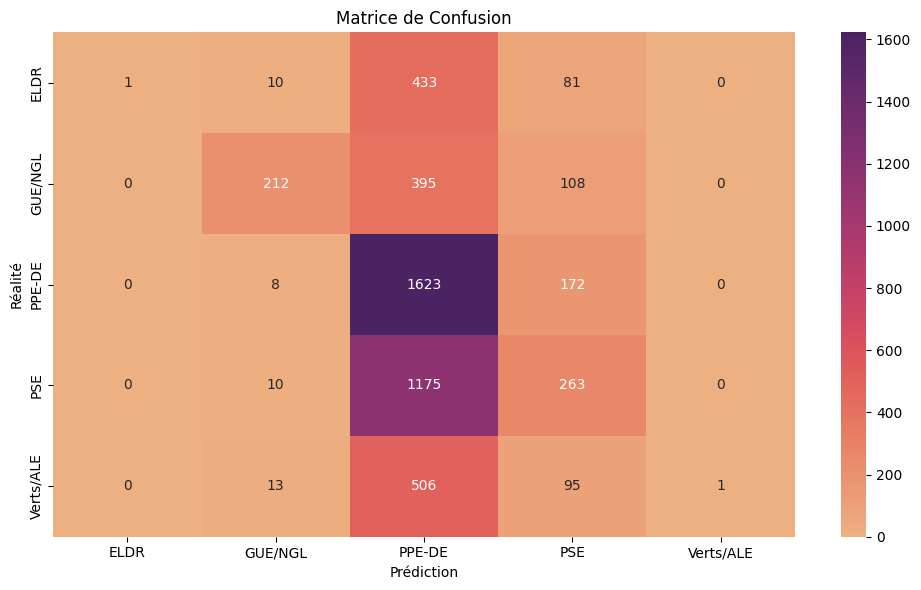

In [14]:
# Création du modèle --> 1 minute et 59 secondes

# Nous avons essayé avec l'hyperparamètre n_estimators=100 car il améliore généralement les performances du modèle, mais malheureusement pas ici
random_forest = RandomForestClassifier(random_state=42)

# On appelle notre fonction de classification
name_random_forest, cm_random_forest, pred_random_forest = classification_data(random_forest, datas_train, classes_train, datas_test, classes_test, "Random Forest", class_names)

In [15]:
# Calcul des métriques :
macro_precision_random_forest, macro_recall_random_forest, waighted_f1_random_forest = metrics_classification(classes_test, pred_random_forest)

Macro Précision : 0.72
Macro Rappel : 0.28
F1-score pondérée : 0.32


#### 3) **Naïve Bayes**

In [16]:
from sklearn.naive_bayes import MultinomialNB

 🥁 Chargement ... 🥁
🎄 Résultat : Naïve Bayes 🎄
              precision    recall  f1-score   support

        ELDR       0.00      0.00      0.00       525
     GUE-NGL       1.00      0.00      0.00       715
      PPE-DE       0.35      1.00      0.52      1803
         PSE       0.35      0.00      0.01      1448
   Verts-ALE       0.00      0.00      0.00       615

    accuracy                           0.35      5106
   macro avg       0.34      0.20      0.11      5106
weighted avg       0.36      0.35      0.19      5106

Accuracy: 0.35428907168037604
🎨 Matrice de Confusion 🎨


/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

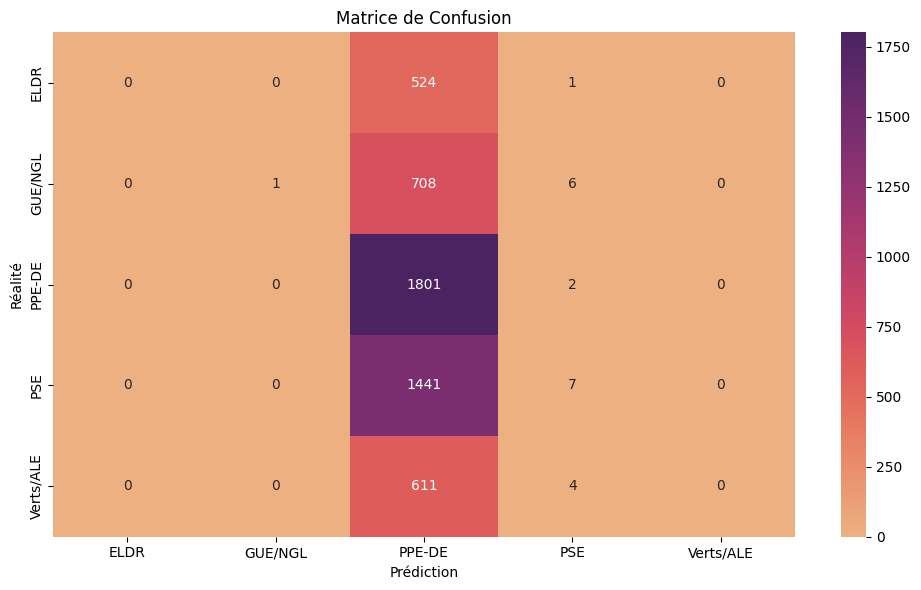

In [17]:
# Création du modèle --> 1 seconde

# En ajoutant des hyperparamètres (comme alpha), cela baissait
naive_bayes = MultinomialNB()

# On appelle notre fonction de classification
name_naive_bayes, cm_naive_bayes, pred_naive_bayes = classification_data(naive_bayes, datas_train, classes_train, datas_test, classes_test, "Naïve Bayes", class_names)

In [18]:
# Calcul des métriques :
macro_precision_naive_bayes, macro_recall_naive_bayes, waighted_f1_naive_bayes = metrics_classification(classes_test, pred_naive_bayes)

Macro Précision : 0.34
Macro Rappel : 0.2
F1-score pondérée : 0.19


/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 4) **Perceptron**

In [19]:
from sklearn.linear_model import Perceptron

 🥁 Chargement ... 🥁
🎄 Résultat : Perceptron 🎄
              precision    recall  f1-score   support

        ELDR       0.28      0.19      0.23       525
     GUE-NGL       0.55      0.53      0.54       715
      PPE-DE       0.50      0.56      0.53      1803
         PSE       0.40      0.42      0.41      1448
   Verts-ALE       0.32      0.26      0.29       615

    accuracy                           0.44      5106
   macro avg       0.41      0.39      0.40      5106
weighted avg       0.43      0.44      0.44      5106

Accuracy: 0.4428123775949863
🎨 Matrice de Confusion 🎨


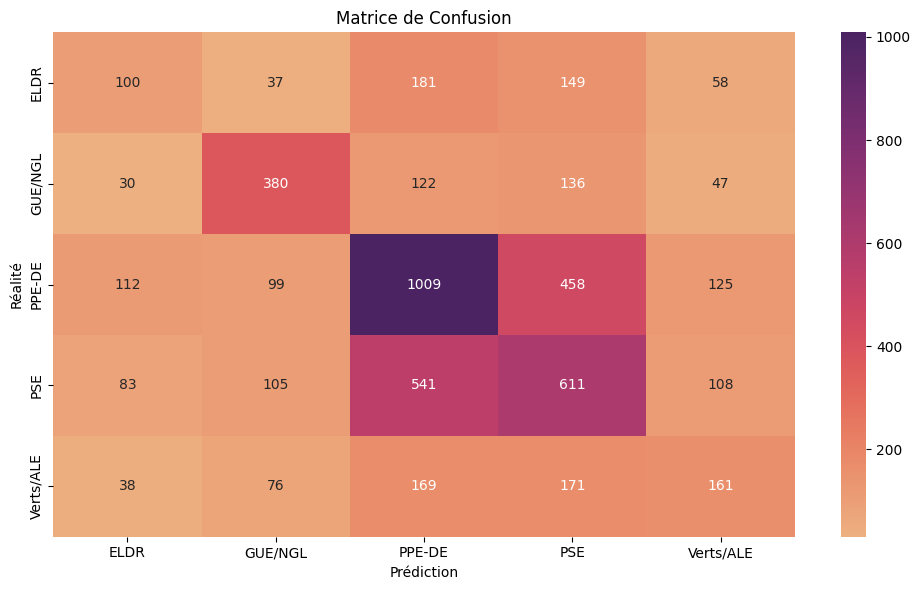

In [20]:
# Création du modèle -->  1 seconde

# L'augmentation de cet hyperparamètre améliore généralement les performances du modèle car il détermine le nombre maximal de passages sur les données d'entraînement (pour ajuster les poids du perceptron).
perceptron = Perceptron(max_iter=1000, random_state=42)

# On appelle notre fonction de classification
name_perceptron, cm_perceptron, pred_perceptron = classification_data(perceptron, datas_train, classes_train, datas_test, classes_test, "Perceptron", class_names)

In [21]:
# Calcul des métriques :
macro_precision_perceptron, macro_recall_perceptron, waighted_f1_perceptron = metrics_classification(classes_test, pred_perceptron)

Macro Précision : 0.41
Macro Rappel : 0.39
F1-score pondérée : 0.44


#### 5) **Support Vector Machine**

In [72]:
from sklearn.svm import SVC

 🥁 Chargement ... 🥁
🎄 Résultat : Support Vector Machine 🎄
              precision    recall  f1-score   support

        ELDR       0.88      0.04      0.08       525
     GUE-NGL       0.74      0.47      0.57       715
      PPE-DE       0.46      0.81      0.59      1803
         PSE       0.44      0.44      0.44      1448
   Verts-ALE       0.68      0.06      0.10       615

    accuracy                           0.49      5106
   macro avg       0.64      0.36      0.36      5106
weighted avg       0.56      0.49      0.43      5106

Accuracy: 0.4855072463768116
🎨 Matrice de Confusion 🎨


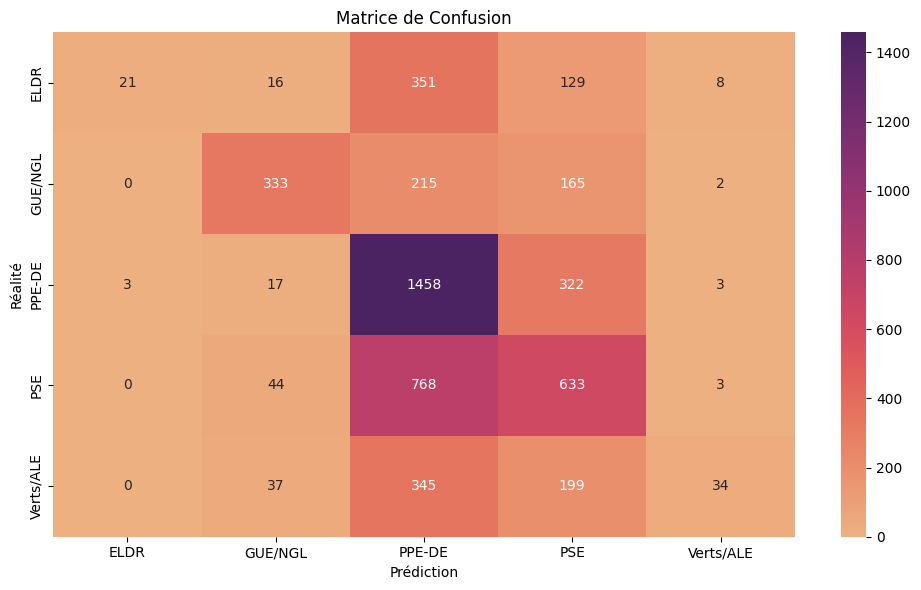

In [ ]:
# Création du modèle --> 40 minutes

svm = SVC()

# On appelle notre fonction de classification
name_svm, cm_svm, pred_svm = classification_data(svm, datas_train, classes_train, datas_test, classes_test, "Support Vector Machine", class_names)


In [24]:
# Calcul des métriques :
macro_precision_svm, macro_recall_svm, waighted_f1_svm = metrics_classification(classes_test, pred_svm)

Macro Précision : 0.51
Macro Rappel : 0.39
F1-score pondérée : 0.45


#### 7) **Linear SVC**

In [25]:
from sklearn.svm import LinearSVC

 🥁 Chargement ... 🥁
🎄 Résultat : Linear SVC 🎄
              precision    recall  f1-score   support

        ELDR       0.37      0.18      0.24       525
     GUE-NGL       0.61      0.56      0.58       715
      PPE-DE       0.50      0.63      0.56      1803
         PSE       0.42      0.44      0.43      1448
   Verts-ALE       0.40      0.26      0.31       615

    accuracy                           0.48      5106
   macro avg       0.46      0.41      0.42      5106
weighted avg       0.47      0.48      0.46      5106

Accuracy: 0.4751273012142577
🎨 Matrice de Confusion 🎨


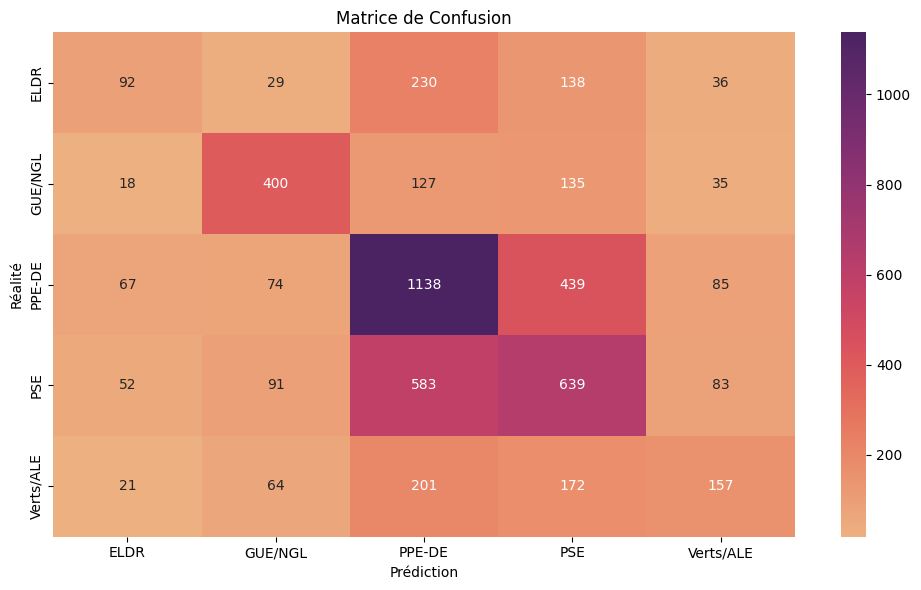

In [69]:

# Création du modèle --> 4 secondes 

linear_svc = LinearSVC()

name_linear_svc, cm_linear_svc, pred_linear_svc = classification_data(linear_svc, datas_train, classes_train, datas_test, classes_test, "Linear SVC", class_names)

In [70]:
# Calcul des métriques :
macro_precision_linear_svc, macro_recall_linear_svc, waighted_f1_linear_svc = metrics_classification(classes_test, pred_linear_svc)

Macro Précision : 0.46
Macro Rappel : 0.41
F1-score pondérée : 0.46


#### 7) **Régression de logistique**

In [28]:
from sklearn.linear_model import LogisticRegression 

 🥁 Chargement ... 🥁


/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🎄 Résultat : Régression Logistique 🎄
              precision    recall  f1-score   support

        ELDR       0.57      0.09      0.15       525
     GUE-NGL       0.67      0.51      0.58       715
      PPE-DE       0.48      0.73      0.58      1803
         PSE       0.42      0.45      0.43      1448
   Verts-ALE       0.47      0.15      0.23       615

    accuracy                           0.48      5106
   macro avg       0.52      0.38      0.39      5106
weighted avg       0.50      0.48      0.45      5106

Accuracy: 0.4825695260477869
🎨 Matrice de Confusion 🎨


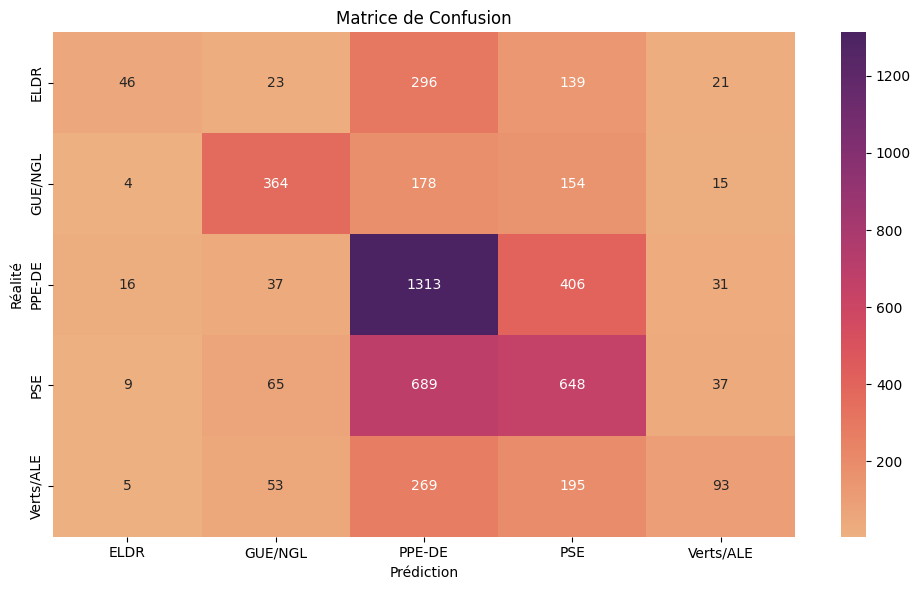

In [29]:
# Création du modèle --> 56 secondes
log_reg = LogisticRegression()

# On appelle notre fonction de classification
name_log_reg, cm_log_reg, pred_log_reg = classification_data(log_reg, datas_train, classes_train, datas_test, classes_test, "Régression Logistique", class_names)

In [30]:
# Calcul des métriques :
macro_precision_log_reg, macro_recall_log_reg, waighted_f1_log_reg = metrics_classification(classes_test, pred_log_reg)

Macro Précision : 0.52
Macro Rappel : 0.38
F1-score pondérée : 0.45


#### 8) **Complement NB**

In [31]:
from sklearn.naive_bayes import ComplementNB

 🥁 Chargement ... 🥁
🎄 Résultat : Complement Naive Bayes 🎄
              precision    recall  f1-score   support

        ELDR       0.40      0.00      0.01       525
     GUE-NGL       0.71      0.29      0.41       715
      PPE-DE       0.40      0.93      0.56      1803
         PSE       0.43      0.16      0.23      1448
   Verts-ALE       0.47      0.02      0.05       615

    accuracy                           0.42      5106
   macro avg       0.48      0.28      0.25      5106
weighted avg       0.46      0.42      0.33      5106

Accuracy: 0.41774383078730903
🎨 Matrice de Confusion 🎨


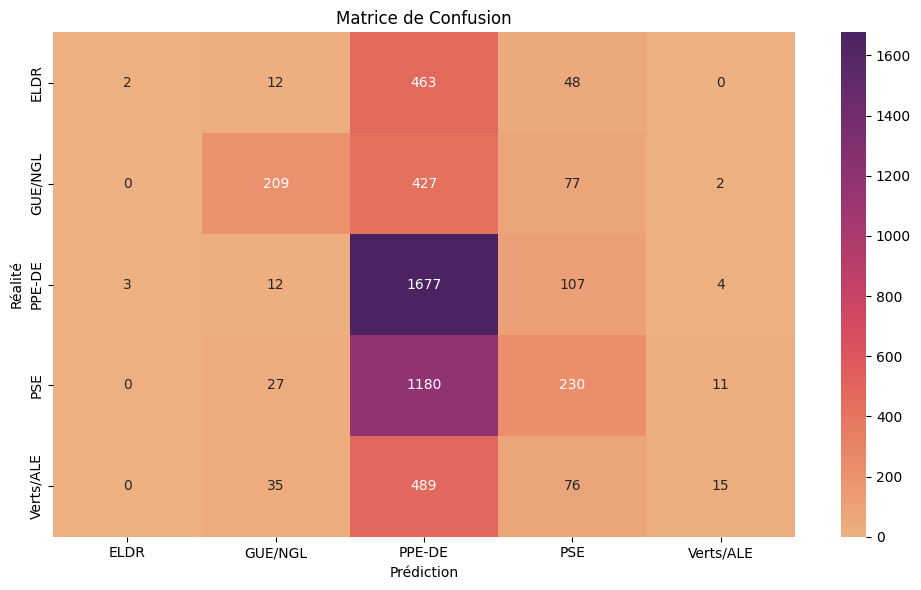

In [32]:
# Création du modèle --> 1 seconde

complemet_nb = ComplementNB()
name_complement_nb, cm_complement_nb, pred_complement_nb = classification_data(complemet_nb, datas_train, classes_train, datas_test, classes_test, "Complement Naive Bayes", class_names)

In [33]:
# Calcul des métriques :
macro_precision_complement_nb, macro_recall_complement_nb, waighted_f1_complement_nb = metrics_classification(classes_test, pred_complement_nb)

Macro Précision : 0.48
Macro Rappel : 0.28
F1-score pondérée : 0.33


9) **Gradient Boosting**

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Gradient Boosting 🎄
              precision    recall  f1-score   support

        ELDR       0.61      0.10      0.17       525
     GUE-NGL       0.64      0.45      0.52       715
      PPE-DE       0.43      0.78      0.56      1803
         PSE       0.40      0.31      0.35      1448
   Verts-ALE       0.57      0.11      0.19       615

    accuracy                           0.45      5106
   macro avg       0.53      0.35      0.36      5106
weighted avg       0.49      0.45      0.41      5106

Accuracy: 0.4520172346259303
🎨 Matrice de Confusion 🎨


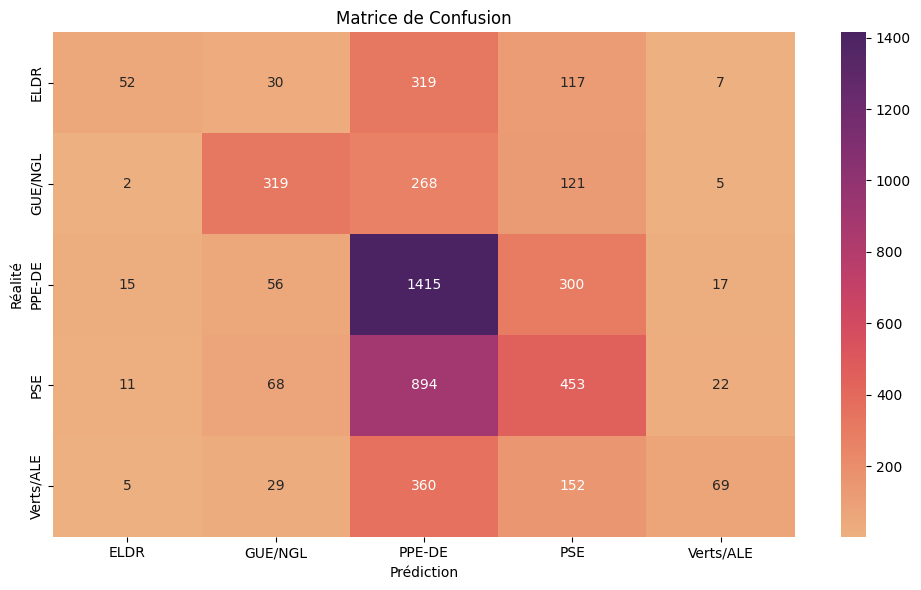

In [37]:
# Création du modèle --> 20 minutes   

gbc = GradientBoostingClassifier(random_state=42)

name_gbc, cm_gbc, pred_gbc = classification_data(gbc, datas_train, classes_train, datas_test, classes_test, "Gradient Boosting", class_names)

In [38]:
# Calcul des métriques :
macro_precision_gbc, macro_recall_gbc, waighted_f1_gbc = metrics_classification(classes_test, pred_gbc)

Macro Précision : 0.53
Macro Rappel : 0.35
F1-score pondérée : 0.41


10) **Bernoulli NB**

In [55]:
from sklearn.naive_bayes import BernoulliNB

 🥁 Chargement ... 🥁
🎄 Résultat : Bernoulli Naive Bayes 🎄
              precision    recall  f1-score   support

        ELDR       0.47      0.02      0.03       525
     GUE-NGL       0.41      0.61      0.49       715
      PPE-DE       0.47      0.66      0.55      1803
         PSE       0.43      0.39      0.41      1448
   Verts-ALE       0.37      0.11      0.16       615

    accuracy                           0.44      5106
   macro avg       0.43      0.36      0.33      5106
weighted avg       0.44      0.44      0.40      5106

Accuracy: 0.4426165295730513
🎨 Matrice de Confusion 🎨


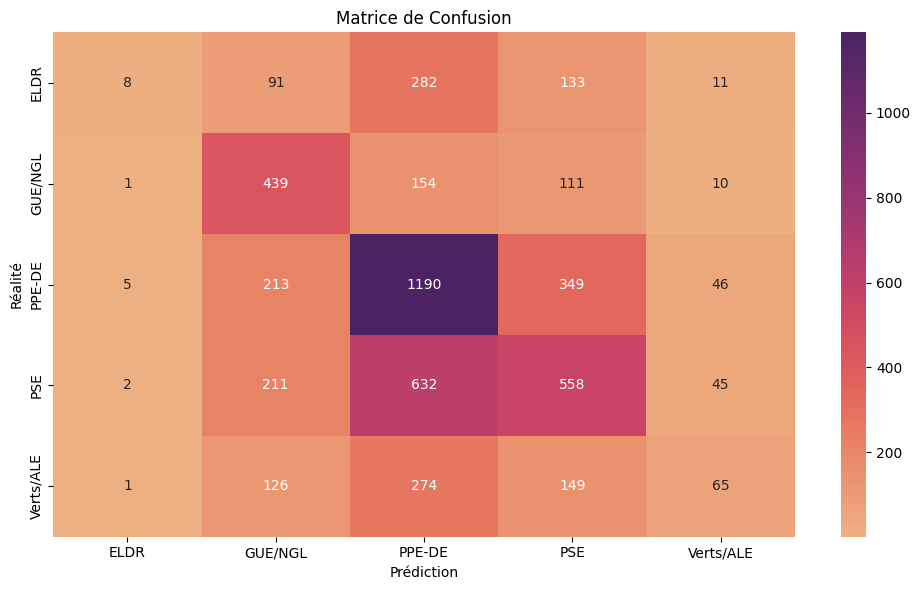

Macro Précision : 0.43
Macro Rappel : 0.36
F1-score pondérée : 0.4


In [56]:
# Création du modèle --> 1 seconde  
bnb = BernoulliNB()

name_bnb, cm_bnb, pred_bnb = classification_data(bnb, datas_train, classes_train, datas_test, classes_test, "Bernoulli Naive Bayes", class_names)

# Calcul des métriques
macro_precision_bnb, macro_recall_bnb, waighted_f1_bnb = metrics_classification(classes_test, pred_bnb)

## Croisement des résutlats de tous nos classifieurs : 

In [75]:
# Affichage des résultats de tous les classifieurs : 
names = [name_tree_model, name_random_forest, name_naive_bayes, name_perceptron, name_svm, name_linear_svc, name_log_reg, name_complement_nb, name_gbc, name_bnb]
macro_precisions = [macro_precision_tree_model, macro_precision_random_forest, macro_precision_naive_bayes, macro_precision_perceptron, macro_precision_svm, macro_precision_linear_svc, macro_precision_log_reg, macro_precision_complement_nb, macro_precision_gbc, macro_precision_bnb]
macro_recalls = [macro_recall_tree_model, macro_recall_random_forest, macro_recall_naive_bayes, macro_recall_perceptron, macro_recall_svm, macro_recall_linear_svc, macro_recall_log_reg, macro_recall_complement_nb, macro_recall_gbc, macro_recall_bnb]
f1_scores = [waighted_f1_tree_model, waighted_f1_random_forest, waighted_f1_naive_bayes, waighted_f1_perceptron, waighted_f1_svm, waighted_f1_linear_svc, waighted_f1_log_reg, waighted_f1_complement_nb, waighted_f1_gbc, waighted_f1_bnb]

# On crée un DataFrame pour afficher les résultats
df_results = pd.DataFrame({
    "Modèle": names,
    "Macro Précision": macro_precisions,
    "Macro Rappel": macro_recalls,
    "F1-score pondérée": f1_scores
})

# trier les résultats par F1-score pondérée :
df_results = df_results.sort_values(by="F1-score pondérée", ascending=False)

df_results

,Modèle,Macro Précision,Macro Rappel,F1-score pondérée
5,Linear SVC,0.46,0.41,0.46
4,Support Vector Machine,0.51,0.39,0.45
6,Régression Logistique,0.52,0.38,0.45
3,Perceptron,0.41,0.39,0.44
8,Gradient Boosting,0.53,0.35,0.41
9,Bernoulli Naive Bayes,0.43,0.36,0.40
7,Complement Naive Bayes,0.48,0.28,0.33
0,Arbre de Décision,0.29,0.29,0.33
1,Random Forest,0.72,0.28,0.32
2,Naïve Bayes,0.34,0.20,0.19


In [76]:
# On sauvegarde les résultats dans un fichier csv

df_results.to_csv("./results/results_classifiers_clean.csv", index=False)